# FFF step 1: scaffold selection

In [100]:
%load_ext autoreload
%autoreload 2
import hippo
from os import environ, system
from pathlib import Path
import json
from mrich import print
import mrich
import shutil
import molparse as mp
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get BulkDock HIPPO database

In [91]:
target_name = "ZIKA_NS3_helicase"
merging_hypothesis = "RNA-Cleft"

In [5]:
animal = hippo.HIPPO(target_name, Path(environ["BULK"])/"TARGETS"/target_name/f"{target_name}.sqlite")

 Creating HIPPO animal

name = ZIKA_NS3_helicase

db_path = /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/ZIKA_NS3_helicase/ZIKA_NS3_helicase.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/ZIKA_NS3_helicase/ZIKA_NS3_helicase.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ 
/opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/ZIKA_NS3_helicase/ZIKA_NS3_helicase.sqlite!

 Success  Initialised animal HIPPO("ZIKA_NS3_helicase")!

In [92]:
merging_hypotheses = json.load(open("merging_hypotheses.json", "rt"))
assert merging_hypothesis in merging_hypotheses

## Enter manual designs

These will be used as scaffolds regardless of any curation

In [47]:
manual_designs = [
    # populate tuples in this format:
    # (smiles: str, alias: str, inspirations: list[str], tags: list[str]),
    ("n2nc1n(nc(Cl)cc1)n2", "8um3_soaked", ["8um3-a"], []),
]

 C1888 "8um3_soaked"

inchikey = RRBQGBYFXZPPAH-UHFFFAOYSA-N

alias = 8um3_soaked

smiles = Clc1ccc2nnnn2n1

bases = None

elabs = None

is_base = False

is_elab = False

num_heavy_atoms = 10

num_rings = 2

formula = C4H2ClN5

#reactions (product) = 0

#reactions (reactant) = 0

tags = []

#poses = 0

metadata = {}

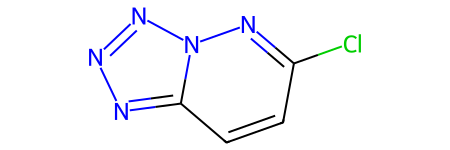

In [52]:
for smiles, alias, inspirations, tags in manual_designs:
    for inspiration in inspirations:
        p = animal.poses[inspiration]
        assert p, f"inspiration not found {inspiration}"
    c = animal.register_compound(smiles=smiles, alias=alias)
    for tag in tags:
        c.add_tag(tag)
    c.summary()

## Parse Fragalysis curation CSVs

In [8]:
curation_csvs = Path("../curation").glob("*.csv")
curation_csvs = list(curation_csvs)
mrich.print(curation_csvs)

[]

## Parse Syndirella manual input from chemistry review

In [10]:
pass

## Select and Tag scaffolds

Create a tag for each merging hypothesis's selected scaffolds. Consider using multiple criteria to select your scaffolds:

- BulkDock export tag / metadata
- Human-curation from Fragalysis
- Human-review of chemistry

In [22]:
# start with all BulkDock exported poses
scaffold_poses = animal.poses.get_by_metadata_substring_match("_fragalysis.sdf")
scaffold_poses

poses with '_fragalysis.sdf' in metadata: {P × 30}

In [26]:
# select the best pose (by RMSD to fragments) for each compound
scaffold_poses = scaffold_poses.compounds.best_placed_poses
scaffold_poses

{P × 16}

In [40]:
# manually add some poses
animal.poses(tag="[Other] Covalent to Cys262").interactive()

Output()

In [35]:
# veto some poses
scaffold_poses -= 159
scaffold_poses -= 1210
scaffold_poses -= 1386
scaffold_poses -= 1388
scaffold_poses -= 1405

In [36]:
# look at the poses
scaffold_poses.interactive()

Output()

In [93]:
# clear and add the scaffold tag
tag = f"{merging_hypothesis} scaffolds"
animal.tags.delete(tag)
scaffold_poses.add_tag(tag)
scaffold_poses.compounds.add_tag(tag)

for record in manual_designs:
    smiles = record[0]
    c = animal.compounds(smiles=smiles)
    c.add_tag(tag)

Tagged {P × 11} w/ "RNA-Cleft scaffolds"

Tagged {C × 11} w/ "RNA-Cleft scaffolds"

## Create Syndirella inputs

### Scaffold poses

In [94]:
elab_path = Path(f"../syndirella/{merging_hypothesis}")

In [95]:
df = scaffold_poses.to_syndirella(elab_path, separate=True)

╭───────────╮
│ 0/11: P53 │
╰───────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P53

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga1-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P53_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P53_syndirella_inspiration_hits.sdf...

╭───────────╮
│ 1/11: P60 │
╰───────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P60

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7g9t-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P60_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P60_syndirella_inspiration_hits.sdf...

╭───────────╮
│ 2/11: P65 │
╰───────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P65

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/8v7u-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P65_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P65_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 3/11: P374 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P374

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7g9y-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P374_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P374_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 4/11: P591 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P591

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga2-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P591_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P591_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 5/11: P604 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P604

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga2-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P604_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P604_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 6/11: P787 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P787

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga1-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P787_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P787_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 7/11: P807 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P807

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga2-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P807_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P807_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 8/11: P811 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P811

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga2-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P811_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P811_syndirella_inspiration_hits.sdf...

╭────────────╮
│ 9/11: P813 │
╰────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P813

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7ga2-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P813_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P813_syndirella_inspiration_hits.sdf...

╭─────────────╮
│ 10/11: P986 │
╰─────────────╯

 DISK  Writing ../syndirella/RNA-Cleft/templates...

out_key = P986

#poses = 1

Output()

 DISK  Writing ../syndirella/RNA-Cleft/templates/7g9y-a_apo-desolv.pdb...

 DISK  Writing ../syndirella/RNA-Cleft/P986_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/P986_syndirella_inspiration_hits.sdf...

In [96]:
df

,smiles,template,compound_set,hit1,hit2
0,CN(NC1CCC(c2ccsc2)C1C(=O)O)c1ccc(CCC2(C)NC(=O)...,7ga1-a,P53,7ga1-a,8v7r-b
0,CC1NOC(NC(=O)CC2CCCC2)N1O,7g9t-a,P60,8v7u-a,7g9t-a
0,CC1(CCc2ccc(OCc3noc(NC(=O)CC4CCCC4)n3)cc2)NC(=...,8v7u-a,P65,8v7u-a,8v7r-b
0,CC(NCCCN1CCC(C(C)(C)C)CC1)C1CS(=O)(=O)C1,7g9y-a,P374,7ga3-a,7g9y-a
0,Sc1nc(N2CCCC2)nc2c1CNCC2,7ga2-a,P591,7ga2-a,7g9y-a
0,Nc1nc(N2CCCC2)nc2c1CNCC2,7ga2-a,P604,7ga2-a,7g9y-a
0,c1csc(-c2ncc3c(n2)CNC3)c1,7ga1-a,P787,7ga1-a,7g9y-a
0,c1nc(C2CCSC2)nc2c1CNCC2,7ga2-a,P807,7ga2-a,7g9y-a
0,c1nc(C2CSCCS2)nc2c1CNCC2,7ga2-a,P811,7ga2-a,7g9y-a
0,c1nc(C2CCCCC2)nc2c1CNCC2,7ga2-a,P813,7ga2-a,7g9y-a


### Manual designs

In [101]:
dfs = []
for smiles, alias, inspirations, tags in manual_designs:

    out_key = animal.compounds(smiles=smiles).name
    
    inspirations = animal.poses[inspirations]
    reference = inspirations[0]
    d = dict(
        smiles=smiles,
        template=reference.name,
        compound_set=out_key
    )

    for i, p in enumerate(inspirations):
        d[f"hit{i+1}"] = p.name

    data.append(d)

    df = pd.DataFrame([d])

    csv_name = elab_path / f"{out_key}_syndirella_input.csv"
    mrich.writing(csv_name)
    df.to_csv(csv_name, index=False)

    sdf_name = elab_path / f"{out_key}_syndirella_inspiration_hits.sdf"
    inspirations.write_sdf(
            sdf_name,
            inspirations=False,
            tags=False,
            metadata=False,
            reference=False,
            name_col="name",
    )

    template_dir = elab_path / "templates"
    mrich.writing(template_dir / reference.apo_path.name)
    shutil.copy(reference.apo_path, template_dir / reference.apo_path.name)

    dfs.append(df)

pd.concat(dfs)

 DISK  Writing ../syndirella/RNA-Cleft/8um3_soaked_syndirella_input.csv...

Output()

 DISK  Writing ../syndirella/RNA-Cleft/8um3_soaked_syndirella_inspiration_hits.sdf...

 DISK  Writing ../syndirella/RNA-Cleft/templates/8um3-a_apo-desolv.pdb...

,smiles,template,compound_set,hit1
0,n2nc1n(nc(Cl)cc1)n2,8um3-a,8um3_soaked,8um3-a
